In [1]:
import matplotlib.pyplot as plt
import numpy as np

# One-Dimensional Optimization

We begin our study of methods for optimization with problems in one dimension. The
one-dimensional case is simpler than multidimensional optimization yet illustrates many of
the ideas and issues that arise in higher dimensions.

## Golden Section Search

In [3]:
def golden(func,lower,upper,ratio=None,tol=1e-5):
    """It is the implementation of golden section search technique."""

    ratio = (5**(1/2)-1)/2 if ratio is None else ratio

    x1 = (1-ratio)*upper+ratio*lower
    x2 = (1-ratio)*lower+ratio*upper

    f1 = func(x1)
    f2 = func(x2)

    calls = 2

    while (upper-lower)>tol:

        if f1>f2:
            lower = x1
            x1 = x2
            f1 = f2
            x2 = (1-ratio)*lower+ratio*upper
            f2 = func(x2)
        else:
            upper = x2
            x2 = x1
            f2 = f1
            x1 = (1-ratio)*upper+ratio*lower
            f1 = func(x1)

        calls += 1

    return (lower+upper)/2, func((lower+upper)/2)

In [4]:
def objective(x):
    return (x-2)**2+2

In [6]:
def objective(x):
    return 0.5-x*np.exp(-x**2)

In [5]:
def objective(x):
    F = 10+0.2*x**(2.3)
    G = 10+80*np.exp(-0.3*x)
    return F+G

In [7]:
def objective(x):
    return x*(x-2)*(x-3)*(x-6)+15

In [9]:
def objective4(x):
    return (x**2)/(1-x)

In [10]:
x = np.linspace(0,4,100)
y = objective(x)

gs = golden(objective,0,4,tol=4e-2)

print(gs)

(0.7175207925447946, 3.904945249330682)


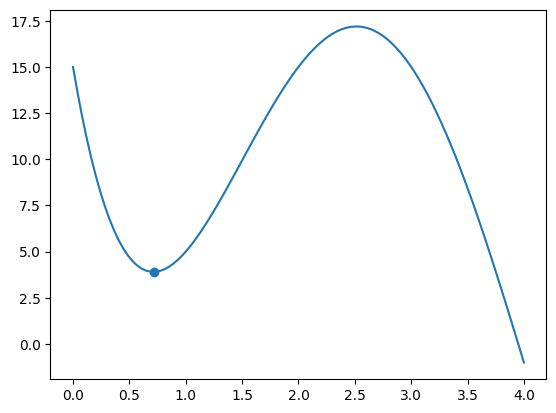

In [11]:
plt.plot(x,y)
plt.scatter(gs[0],gs[1])
plt.show()

## Successive Parabolic Interpolation

In [15]:
def minima(x0,x1,x2,f0,f1,f2):

    alpha = (f1-f0)/(x1-x0)
    betta = (f2-f0-alpha*(x2-x0))/(x2-x0)/(x2-x1)

    return (x0+x1)/2-alpha/(2*betta)

In [16]:
def parabolic(func,lower,upper,tol=1e-5):
    """It is the implementation of successive parabolic interpolation."""

    x0,x2 = lower,upper
    
    calls = 2
    f0,f2 = func(x0),func(x2)

    x1 = (x0+x2)/2

    calls += 1
    f1 = func(x1)

    while abs(x2-x0)>tol:

        x3 = minima(x0,x1,x2,f0,f1,f2)

        calls += 1
        f3 = func(x3)

        x0,f0 = x1,f1
        x1,f1 = x2,f2
        x2,f2 = x3,f3

    return x2, f2

0.7071071604675768 0.07111805751977002


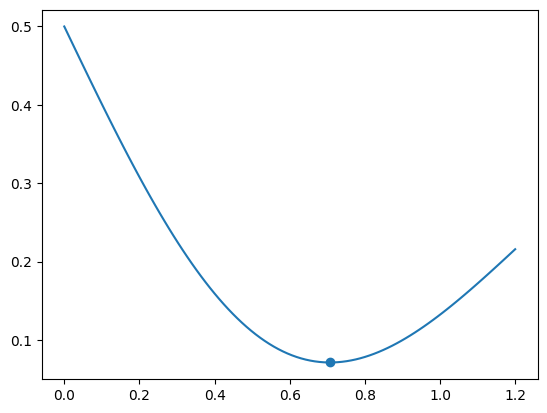

In [17]:
def objective(x):
    return 0.5-x*np.exp(-x**2)

x = np.linspace(0,1.2,100)

o = objective(x)

pb = parabolic(objective,0,1.2,tol=1e-2)

print(pb[0],pb[1])

plt.plot(x,o)
plt.scatter(pb[0],pb[1])
plt.show()

## Newton's Method

A local quadratic approximation to the objective function is useful because the minimum
of a quadratic is easy to compute. Another way to obtain a local quadratic approximation
is to use a truncated Taylor series expansion,

## Safeguarded Methods

As with solving nonlinear equations in one dimension, slow-but-sure and fast-but-risky
optimization methods can be combined to provide both safety and efficiency. A bracketing
interval, in which the solution is known to lie, is maintained so that if the fast method
generates an iterate that would lie outside the interval, then the safe method can be used
to reduce the length of the bracketing interval before trying the fast method again, with
a better chance of producing a reliable result. Most library routines for one-dimensional
optimization are based on such a hybrid approach. One popular combination, which requires
no derivatives of the objective function, is golden section search and successive parabolic
interpolation.